# **Вводная информация**

EDA данных представленных партнером для задачи №2 — тематическая классификация текстов. Файлы от партнера не содержали разметку в связи с чем были прогнанны чезез LLM на предмет тематической разметки этих текстов. Для разметки брались тексты из колонки doc_text. Итоговый результат был скомбинирован в единый файл, который содержит 2 колонки - text и lables

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('dataset.csv')

df.head()

,text,labels,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,Твой лучший секс спрятан здесь 🔞 Делюсь канал...,"соцсети, реклама",NaN,NaN,NaN
1,⭐️ Кнопка: ⭐️START⭐️(https://t.me/major/start...,"соцсети, реклама",NaN,NaN,NaN
2,А продолжение где? Правильно. В моем сообществ...,иное,NaN,NaN,NaN
3,Тем временем моя авторская телега уверенно в т...,политика,NaN,NaN,NaN
4,"У меня есть двоюродная сестра, у нее есть сын ...","соцсети, реклама, медиа",NaN,NaN,NaN


Задача имеет следующие технические требования:
1. Длина текста — от 2 до 30 слов
2. Тематики: спорт, юмор, реклама, соцсети, политика, личная жизнь.

Проверим имеющиеся данные на соответсвтие техническим требованиям.

In [2]:
df.drop(columns=['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], inplace=True)
df['length'] = df['text'].apply(lambda x: len(x.split()))
df.describe(include='all')

,text,labels,length
count,5999,5940,5999.000000
unique,5420,219,NaN
top,ПОЛНЫЕ ВЫПУСКИ В ШАПКЕ ПРОФИЛЯ☝🏻 Мария Маркова...,иное,NaN
freq,58,1393,NaN
mean,NaN,NaN,54.045841
std,NaN,NaN,78.040743
min,NaN,NaN,1.000000
25%,NaN,NaN,10.000000
50%,NaN,NaN,25.000000
75%,NaN,NaN,66.000000


In [3]:
df['labels'] = df['labels'].apply(lambda x: str(x).split(', '))
df.head()

,text,labels,length
0,Твой лучший секс спрятан здесь 🔞 Делюсь канал...,"[соцсети, реклама]",81
1,⭐️ Кнопка: ⭐️START⭐️(https://t.me/major/start...,"[соцсети, реклама]",3
2,А продолжение где? Правильно. В моем сообществ...,[иное],13
3,Тем временем моя авторская телега уверенно в т...,[политика],13
4,"У меня есть двоюродная сестра, у нее есть сын ...","[соцсети, реклама, медиа]",30


In [4]:
labels_set = set()
for labels in df['labels']:
    labels_set.update(labels)
labels_set

{' stered peuple stereopeople г москва ул. новослободская 16а комментатор дмитрий шнякин',
 ' з аокомотив 30 57 30 56 сергей игнашевич / ic on % разговор о футболе',
 ' челеи не проигрывает',
 '99% из них даже не смогли найти Украину на карте. Так что не скажи мне',
 'nan',
 'А вы слышали? Немцы требуют переиграть четвертьфинальный матч этого чемпионата Европы против сборной Испании. Петицию уже подписали более 300 тысяч болельщиков. Естественно',
 'Александр Степанов у нас в эфире. Александр',
 'Боже мой',
 'Вернули',
 'Все это мы Все это мы Все это мы',
 'Господи',
 'Давай посмотрим ещё раз. В порядке.',
 'Давайте',
 'Давно я не участвовала в этом сумасшедшем кинотеатре. Раздябы',
 'Добро пожаловать в Флориду',
 'Лореонов!',
 'Паул Амо Родриго Дани Карбахал Гесус Набас Альваро Мората Хосе Лу Начо Фердане Луис Де Ла Фуенте Алекс Ремиро Аймерик Лапорт Фабиан Руид Микел Айарзабал Микел Мерино Робин Ленарман Александр Грималдо Александр Баена Марк Кукурея Унай Симон Дани Ольмо Ферран Тор

Как мы видем, сами тексты не соотвествуют, поставленному тз, т.к. есть тексты длиной 1 слово или длиной более 30 слов. Кроме того, разметка силами LLM прошла не очень удачно, что видно из перечня категорий. Кроме того, не везде проставились лейблы. Почистим наш датасет.

In [5]:
df = df[(df['length'] >= 2) & (df['length'] <= 30)]

In [6]:
good_labels = ['спорт', 'юмор', 'реклама', 'соцсети', 'политика', 'личная жизнь']
def remove_odd_lables(lables):
  lst = list(lables)
  return list(filter(lambda x: x in good_labels, lst))

df['labels'] = df['labels'].apply(remove_odd_lables)

<ipython-input-6-89d76ac7cbf1>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['labels'] = df['labels'].apply(remove_odd_lables)


In [7]:
labels_set = set()
for labels in df['labels']:
    labels_set.update(labels)
labels_set

{'личная жизнь', 'политика', 'реклама', 'соцсети', 'спорт', 'юмор'}

In [8]:
df = df[df['labels'].apply(lambda x: len(x) > 0)]

In [9]:
df.describe(include='all')

,text,labels,length
count,2062,2062,2062.000000
unique,1833,37,NaN
top,ПОЛНЫЕ ВЫПУСКИ В ШАПКЕ ПРОФИЛЯ☝🏻 Мария Маркова...,"[соцсети, реклама]",NaN
freq,58,770,NaN
mean,NaN,NaN,14.060621
std,NaN,NaN,7.600321
min,NaN,NaN,2.000000
25%,NaN,NaN,8.000000
50%,NaN,NaN,13.000000
75%,NaN,NaN,20.000000


После того, как мы почистили наш датасет кол-во размеченных строк сократилось до 2062 с 5999.

# **Анализ качества разметки.**

In [10]:
from sklearn.preprocessing import MultiLabelBinarizer

mlb = MultiLabelBinarizer()
df_encoded = pd.DataFrame(mlb.fit_transform(df['labels']), columns=mlb.classes_)
df_encoded.head()

,личная жизнь,политика,реклама,соцсети,спорт,юмор
0,0,0,1,1,0,0
1,0,1,0,0,0,0
2,0,0,1,1,0,0
3,0,1,0,0,0,0
4,0,0,1,1,0,0


Text(0, 0.5, 'Кол-во текстов')

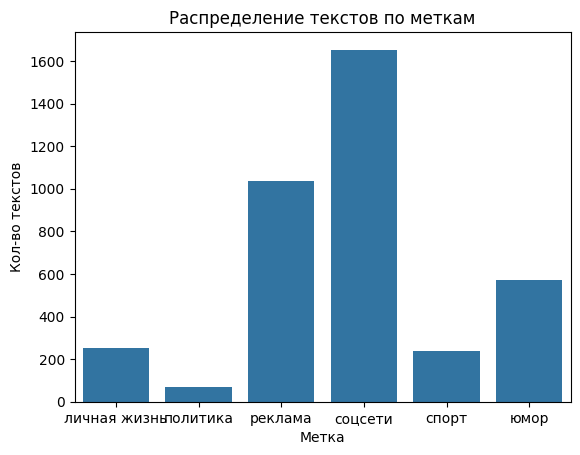

In [11]:
column_sums = df_encoded.sum()
sns.barplot(x=column_sums.index, y=column_sums.values)
plt.title('Распределение текстов по меткам')
plt.xlabel('Метка')
plt.ylabel('Кол-во текстов')

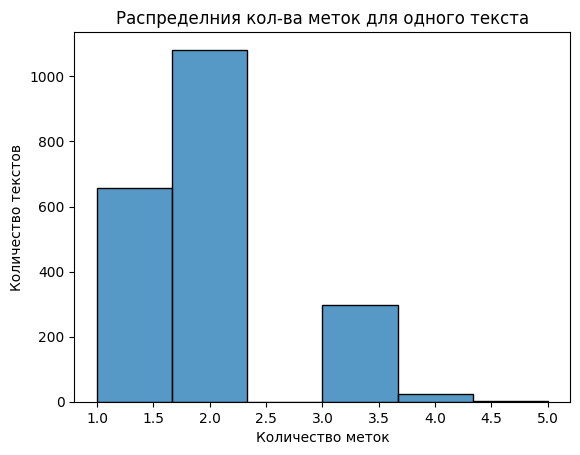

In [12]:
df_encoded['sum_labels'] = df_encoded.sum(axis=1)
sns.histplot(df_encoded['sum_labels'], bins=df_encoded['sum_labels'].max()+1)
plt.title('Распределния кол-ва меток для одного текста')
plt.xlabel('Количество меток')
plt.ylabel('Количество текстов')
plt.show()

Как видно на представленных графиках, у нас есть сильный перекос меток в сторону рекламы и соцсетей, при этом сильно не хватает текстов в категориях политика, личная жизнь и спорт. Также у нас мало текстов, которые имеют более 2 меток.

# **Анализ структуры текста**

<Axes: xlabel='length', ylabel='Count'>

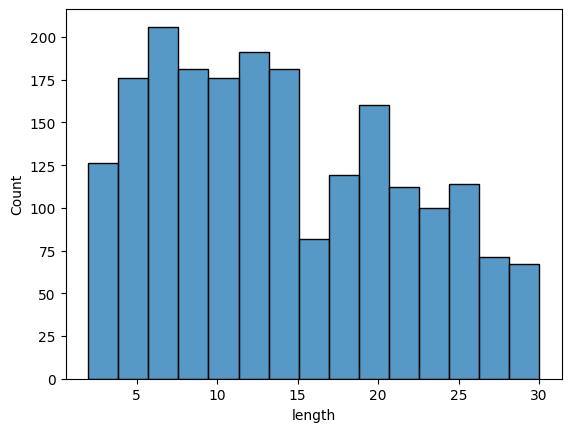

In [13]:
sns.histplot(df['length'])

In [14]:
import re
import string

def contains_digits(text):
  return bool(re.search(r'\d', text))

def contains_many_spaces(text):
  return bool(re.search(r'\s{2,}', text))

def contains_cyrillic(text):
  return bool(re.search(r'[а-яА-Я]', text))

def contains_latin(text):
  return bool(re.search(r'[a-zA-Z]', text))

def contains_additional_symbols(text):
  """
  Ищем символы, которые не являются буквами, цифрами и пробелами или символами пунтктуации
  """
  text = str(text).strip(string.punctuation)
  return bool(re.search(r'[^\w\s]', text))

df['contains_digits'] = df['text'].apply(contains_digits)
df['contains_many_spaces'] = df['text'].apply(contains_many_spaces)
df['contains_cyrillic'] = df['text'].apply(contains_cyrillic)
df['contains_latin'] = df['text'].apply(contains_latin)
df['contains_additional_symbols'] = df['text'].apply(contains_additional_symbols)

In [15]:
text_df = df[['text',
              'contains_digits',
              'contains_many_spaces',
              'contains_cyrillic',
              'contains_latin',
              'contains_additional_symbols'
              ]]
text_df.head()

,text,contains_digits,contains_many_spaces,contains_cyrillic,contains_latin,contains_additional_symbols
1,⭐️ Кнопка: ⭐️START⭐️(https://t.me/major/start...,True,True,True,True,True
3,Тем временем моя авторская телега уверенно в т...,False,False,True,False,True
4,"У меня есть двоюродная сестра, у нее есть сын ...",True,True,True,True,True
5,Тем временем моя авторская телега уверенно в т...,False,False,True,False,True
10,КАКАЯ КАРТА УКАЖЕТ НА МАСИКА? 🥰 🎁🔥 РАСПРОДАЖА...,False,True,True,True,True


Text(0.5, 1.0, 'Анализ текста')

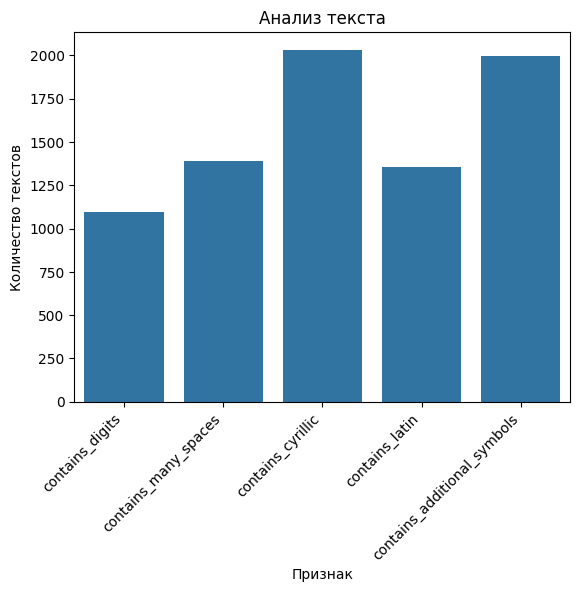

In [16]:
column_sums = text_df.select_dtypes(include=['bool']).sum()
sns.barplot(x=column_sums.index, y=column_sums.values)
plt.xticks(rotation=45, ha='right')
plt.xlabel('Признак')
plt.ylabel('Количество текстов')
plt.title('Анализ текста')


In [17]:
column_sums

,0
contains_digits,1094
contains_many_spaces,1390
contains_cyrillic,2033
contains_latin,1358
contains_additional_symbols,1999


In [18]:
df.duplicated(subset=['text']).sum()

np.int64(229)

Как видно представленные данные имеют хорошее распределение по длине строки. При этом 2062 строк 1999 содержат спец символы, который не являются буквами, числами, пробелами или знаками пунктуации и 1390 строк содержат 2 и более последовательно идущих пробелов в себе. Также есть ряд текстов, которые вообще не содержат русский алфавит (29 шт). Кроме того наш dataset содержит 299 повторений в тексте. В итоге качество данных получается не очень хорошим.

Попробуем другой подход - попросим LLM сгенерировать данные для обучения нашей модели и разметить их. Получим датасет на 10000 строк.

# Анализ синтетического датасета

In [33]:
df_synt = pd.read_csv('dataset_synt.csv')
df_synt.head()

,text,labels
0,Поговорили по душам. Это многое значит для мен...,"личная жизнь,соцсети"
1,Поговорили по душам. Это многое значит для меня,личная жизнь
2,Завёл(а) дневник. Хочу писать каждый день Анек...,"личная жизнь,юмор,реклама"
3,Политики обсуждают будущее страны Ограниченная...,"политика,реклама,соцсети"
4,Сегодня видел(а) друга и снова вспомнил(а) ста...,"личная жизнь,спорт"


In [34]:
df_synt['length'] = df_synt['text'].apply(lambda x: len(x.split()))
df_synt['labels'] = df_synt['labels'].apply(lambda x: str(x).split(','))
df_synt.describe(include='all')

,text,labels,length
count,10000,10000,10000.000000
unique,5693,156,NaN
top,Политики обсуждают будущее страны,[реклама],NaN
freq,119,567,NaN
mean,NaN,NaN,13.843300
std,NaN,NaN,6.030571
min,NaN,NaN,4.000000
25%,NaN,NaN,8.000000
50%,NaN,NaN,14.000000
75%,NaN,NaN,19.000000


In [35]:
df_synt.duplicated(subset=['text']).sum()

np.int64(4307)

Как мы видим, LLM сгенерировала данные в соотвествии с ТЗ. Длина строки находится в заданных пределах [2;30] и все данные размечены. Между тем все еще имеем 4307 дублирующих записи в колонке text.

In [36]:
df_synt = df_synt.drop_duplicates(subset=['text'])
df_synt.describe(include='all')

,text,labels,length
count,5693,5693,5693.000000
unique,5693,156,NaN
top,Я так по тебе скучаю Сегодня команда Реал Мадр...,[соцсети],NaN
freq,1,122,NaN
mean,NaN,NaN,17.558756
std,NaN,NaN,4.609669
min,NaN,NaN,4.000000
25%,NaN,NaN,14.000000
50%,NaN,NaN,18.000000
75%,NaN,NaN,21.000000


<Axes: xlabel='length', ylabel='Count'>

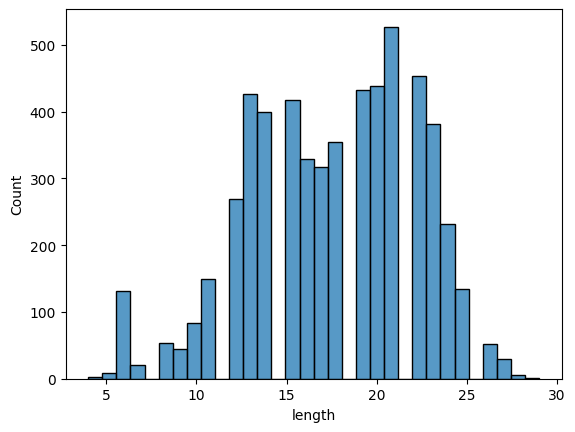

In [37]:
sns.histplot(df_synt['length'])

Text(0.5, 1.0, 'Анализ текста')

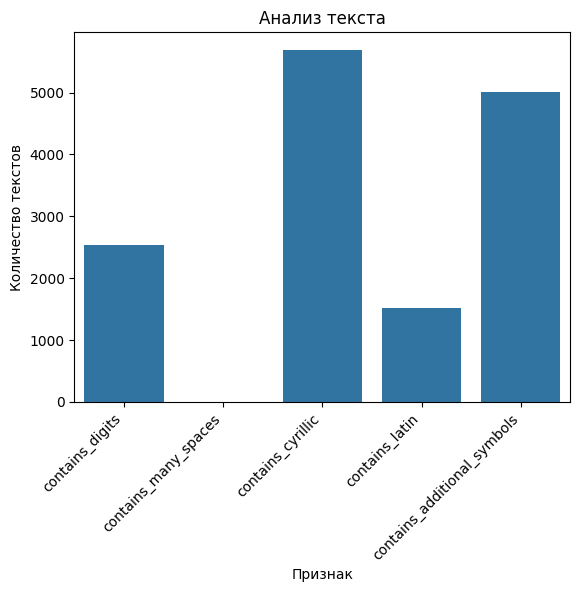

In [38]:
df_synt['contains_digits'] = df_synt['text'].apply(contains_digits)
df_synt['contains_many_spaces'] = df_synt['text'].apply(contains_many_spaces)
df_synt['contains_cyrillic'] = df_synt['text'].apply(contains_cyrillic)
df_synt['contains_latin'] = df_synt['text'].apply(contains_latin)
df_synt['contains_additional_symbols'] = df_synt['text'].apply(contains_additional_symbols)

column_sums = df_synt.select_dtypes(include=['bool']).sum()
sns.barplot(x=column_sums.index, y=column_sums.values)
plt.xticks(rotation=45, ha='right')
plt.xlabel('Признак')
plt.ylabel('Количество текстов')
plt.title('Анализ текста')

Text(0, 0.5, 'Кол-во текстов')

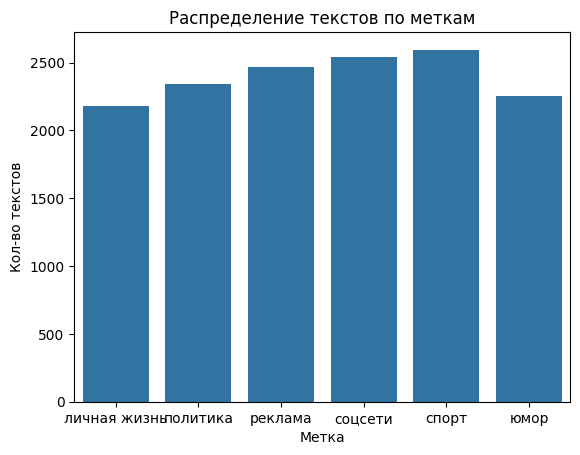

In [39]:
df_synt_encoded = pd.DataFrame(mlb.fit_transform(df_synt['labels']), columns=mlb.classes_)
df_synt_encoded.head()
column_sums = df_synt_encoded.sum()
sns.barplot(x=column_sums.index, y=column_sums.values)
plt.title('Распределение текстов по меткам')
plt.xlabel('Метка')
plt.ylabel('Кол-во текстов')

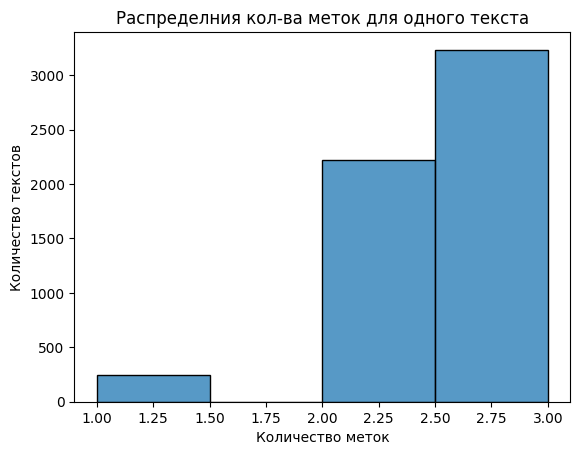

In [40]:
df_synt_encoded['sum_labels'] = df_synt_encoded.sum(axis=1)
sns.histplot(df_synt_encoded['sum_labels'], bins=df_synt_encoded['sum_labels'].max()+1)
plt.title('Распределния кол-ва меток для одного текста')
plt.xlabel('Количество меток')
plt.ylabel('Количество текстов')
plt.show()

Из представленного анализа видно, что синтезированные данные имеют лкчшее распределение по категориям, мало записей с 1 категорией и обладают нормальным распределение по длине текста (короткие тексты и длинные тексты страдают). При этом не имеют множественных пробелов.